# **Analisis de dataset "TitanicSurvived" mediante redes neuronales**

# **Limpieza de datos**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MODULO III Maching Learning Advance  /train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
duplicated_rows = df.duplicated()

Se encontro un porcentaje alto de datos nulos,se procede a eliminarlos

In [11]:
pip install pandas

In [12]:
# Eliminar filas con cualquier valor nulo
df_sin_nulos_filas = df.dropna()

print("\nDataFrame sin filas con valores nulos:")
print(df_sin_nulos_filas)


DataFrame sin filas con valores nulos:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                           

In [42]:
# Especificar las columnas a eliminar
columnas_a_eliminar = ["Age","Cabin","Embarked","Name","Sex","Ticket"]

In [44]:
# Crear un nuevo DataFrame eliminando las columnas especificadas
df_nuevo = df.drop(columns=columnas_a_eliminar)

print("\nNuevo DataFrame sin las columnas "   ":")
print(df_nuevo)


Nuevo DataFrame sin las columnas :
     PassengerId  Survived  Pclass  SibSp  Parch     Fare
0              1         0       3      1      0   7.2500
1              2         1       1      1      0  71.2833
2              3         1       3      0      0   7.9250
3              4         1       1      1      0  53.1000
4              5         0       3      0      0   8.0500
..           ...       ...     ...    ...    ...      ...
886          887         0       2      0      0  13.0000
887          888         1       1      0      0  30.0000
888          889         0       3      1      2  23.4500
889          890         1       1      0      0  30.0000
890          891         0       3      0      0   7.7500

[891 rows x 6 columns]


In [45]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [46]:
df_nuevo.dropna(inplace = True)
X = df_nuevo.drop(columns = ['Survived','Pclass'])
y = df_nuevo['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [48]:
X_train.shape

(668, 4)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Paso 1: Definir la estructura de nuestra red

In [50]:
# Paso 1: Definir nuestra estructura de red
# Guardar la cantidad de características que tenemos como nuestra forma de entrada
input_shape = X_train.shape[1]
input_shape

4

In [51]:
model = Sequential()

In [52]:
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
# Segunda capa oculta
model.add(Dense(10, # Cuántas neuronas tienes en tu segunda capa oculta
                activation = 'relu')) # ¿Qué función de activación estás usando?
# Ultima capa:
#Para problemas de regresión, queremos usar la función de activación linear.
#Para problemas de clasificación, queremos usar la función de activación de Sigmoid.
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

Paso 2: Compilar el modelo

In [53]:
# Paso 2: compilar
model.compile(loss = 'bce', optimizer = 'adam')

Paso 3: Ajustar el modelo

In [54]:
# Paso 3: ajusta nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
21/21 [==============================] - 1s 13ms/step - loss: 0.6947 - val_loss: 0.6882
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6795 - val_loss: 0.6793
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6669 - val_loss: 0.6724
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6564 - val_loss: 0.6667
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6465 - val_loss: 0.6614
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6364 - val_loss: 0.6569
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6253 - val_loss: 0.6537
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6157 - val_loss: 0.6510
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6075 - val_loss: 0.6502
Epoch 10/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6013 - val_loss: 0.6492


In [55]:
print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")

Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'pandas.core.series.Series'>


In [56]:
if type(X_train) == int:
    X_train = X_train.astype(float)
elif type(y_train) == int:
    y_train = y_train.astype(float)

In [57]:
model.compile(loss='mse', optimizer='adam')

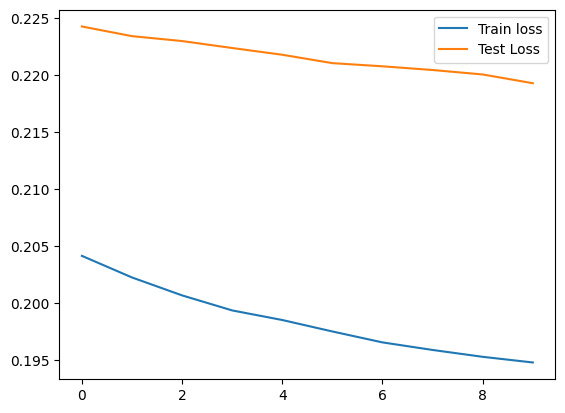

In [59]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Regularizacion

Dilucion

In [60]:
# Sin dilución
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=50)

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 0.7118 - val_loss: 0.6968
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6822 - val_loss: 0.6805
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6621 - val_loss: 0.6722
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6487 - val_loss: 0.6664
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6381 - val_loss: 0.6627
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6303 - val_loss: 0.6602
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6219 - val_loss: 0.6577
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6156 - val_loss: 0.6564
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6086 - val_loss: 0.6555
Epoch 10/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.6549
Epoch 11/50
21/21 

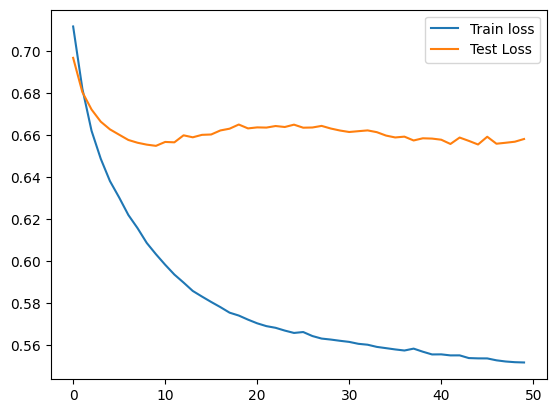

In [61]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

In [62]:
# Con dilución
from tensorflow.keras.layers import Dropout
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dropout(.2))
model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=50)

Epoch 1/50
21/21 [==============================] - 2s 16ms/step - loss: 0.7052 - val_loss: 0.6801
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6795 - val_loss: 0.6627
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6665 - val_loss: 0.6486
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6509 - val_loss: 0.6389
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6503 - val_loss: 0.6330
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6300 - val_loss: 0.6279
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6221 - val_loss: 0.6263
Epoch 8/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6167 - val_loss: 0.6249
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 0.6048 - val_loss: 0.6265
Epoch 10/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6050 - val_loss: 0.6287
Epoch 11/50
21/21 

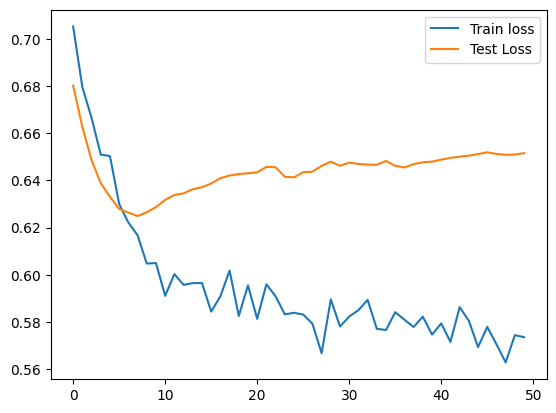

In [63]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

Detencion anticipada

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
# Con detención anticipada
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50
21/21 [==============================] - 1s 11ms/step - loss: 0.6849 - val_loss: 0.6635
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6647 - val_loss: 0.6506
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6487 - val_loss: 0.6417
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6376 - val_loss: 0.6359
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.6308
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6225 - val_loss: 0.6276
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 0.6177 - val_loss: 0.6252
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6120 - val_loss: 0.6228
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6071 - val_loss: 0.6199
Epoch 10/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6030 - val_loss: 0.6184
Epoch 11/50
21/21 

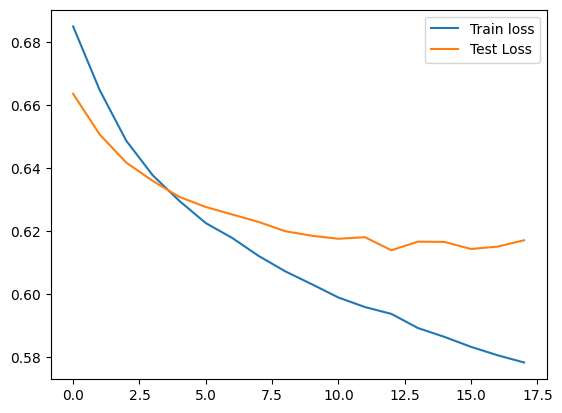

In [65]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

In [66]:
model = Sequential()
model.add(Dense(19,
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dropout(.15))
model.add(Dense(14,
                activation = 'relu'))
model.add(Dropout(.15))
model.add(Dense(8,
                activation = 'relu'))
model.add(Dropout(.15))
model.add(Dense(4,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = "accuracy")
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
21/21 [==============================] - 3s 32ms/step - loss: 0.7098 - accuracy: 0.4446 - val_loss: 0.6910 - val_accuracy: 0.5247
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.5614 - val_loss: 0.6750 - val_accuracy: 0.6278
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.6362 - val_loss: 0.6628 - val_accuracy: 0.6278
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6407 - val_loss: 0.6551 - val_accuracy: 0.6278
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6497 - val_loss: 0.6501 - val_accuracy: 0.6368
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6512 - val_loss: 0.6458 - val_accuracy: 0.6413
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6527 - val_loss: 0.6440 - val_accuracy: 0.6457
Epoch 8/100


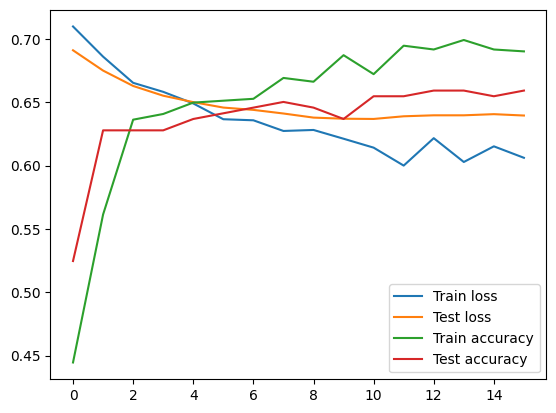

In [67]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend()